# Subway Data Analysis

## Introducao

O sistema de onibus e trens de Nova Iorque - o Metro Transit Authority - fornece seus dados para download atraves de  arquivos csv. Uma das informacoes disponiveis sao os dados das catracas do metro que contam logs semanais de entradas cumulativas e saidas por catraca por estacao de metro em algum intervalo de tempo.


Neste projeto iremos utilizar apenas os das catraca disponiveis em: http://web.mta.info/developers/turnstile.html.




# Sobre este projeto

Neste projeto voce ira aplicar todos os conhecimentos adquiridos neste primeiro mes de curso. Iremos praticar tarefas basicas de aquisicao, limpeza de dados e nesse processo iremos descobrir coisas essenciais sobre os dados utilizando o que foi aprendido no curso de estatistica. 

O objetivo deste projeto eh explorar a relacao entre os dados das catracas do metro de Nova Iorque e o clima no dia da coleta. Para isso, alem dos dados do metro, precisaremos os dados de clima da cidade de Nova Iorque. 

Os principais pontos que serao verificados neste trabalho:

- Coleta de dados da internet
- Utilizacao de estatistica para analise de dados
- Manipulacao de dados e criacao de graficos simples com o `Pandas`

*Como conseguir ajuda*: Sugerimos que tente os seguintes canais, nas seguintes ordens:

| Tipo de duvida\Canais         	| Google 	| Forum 	| Slack 	| Email 	|
|-------------------------------	|--------	|-------	|-------	|-------	|
| Programacao Pyhon e Pandas    	| 1      	| 2     	| 3     	|       	|
| Requisitos do projeto         	|        	| 1     	| 2     	| 3     	|
| Partes especificas do Projeto 	|        	| 1     	| 2     	| 3     	|

Os enderecos dos canais sao:

- Forum: https://discussions.udacity.com/c/ndfdsi-project
- Slack: [udacity-br.slack.com](https://udacity-br.slack.com/messages/C5MT6E3E1)
- Email: data-suporte@udacity.com

**Espera-se que o estudante entregue este relatorio com:**

- Todos os TODO feitos, pois eles sao essenciais para que o codigo rode corretamente
- O arquivo ipynb exportado como html

Para entregar este projeto, va a [sala de aula](https://coco.udacity.com/nanodegrees/nd111/locale/pt-br/versions/1.0.0/parts/339726/modules/339733/lessons/340886/project) e submeta o seu `.ipynb` e o html, zipados.

# Lembretes

Antes de comecarmos, alguns lembretes devem ter em mente ao usar os notebooks iPython:

- Lembre-se de que voce pode ver do lado esquerdo de uma celula de codigo quando foi executado pela ultima vez se houver um numero dentro das chaves.
- Quando voce inicia uma nova sessao do notebook, certifique-se de executar todas as celulas ate o ponto em que voce deixou a ultima vez. Mesmo que a saida ainda seja visivel a partir de quando voce executou as celulas em sua sessao anterior, o kernel comeca em um estado novo, entao voce precisara recarregar os dados, etc. em uma nova sessao.
- O ponto anterior eh util para ter em mente se suas respostas nao correspondem ao que eh esperado nos questionarios da aula. Tente recarregar os dados e execute todas as etapas de processamento um a um para garantir que voce esteja trabalhando com as mesmas variaveis e dados que estao em cada fase do questionario.

In [1]:
import pandas as pd

# Read the Udacity site CSV file and put it into a Pandas DataFrame
turnstile = pd.read_csv('turnstile_data_master_with_weather.csv', sep=",")

print(turnstile)


        Unnamed: 0  UNIT       DATEn     TIMEn  Hour    DESCn  \
0                0  R001  2011-05-01  01:00:00     1  REGULAR   
1                1  R001  2011-05-01  05:00:00     5  REGULAR   
2                2  R001  2011-05-01  09:00:00     9  REGULAR   
3                3  R001  2011-05-01  13:00:00    13  REGULAR   
4                4  R001  2011-05-01  17:00:00    17  REGULAR   
5                5  R001  2011-05-01  21:00:00    21  REGULAR   
6                6  R002  2011-05-01  01:00:00     1  REGULAR   
7                7  R002  2011-05-01  05:00:00     5  REGULAR   
8                8  R002  2011-05-01  09:00:00     9  REGULAR   
9                9  R002  2011-05-01  13:00:00    13  REGULAR   
10              10  R002  2011-05-01  17:00:00    17  REGULAR   
11              11  R002  2011-05-01  21:00:00    21  REGULAR   
12              12  R003  2011-05-01  00:00:00     0  REGULAR   
13              13  R003  2011-05-01  04:00:00     4  REGULAR   
14              14  R003 

## Secao 1 - Coleta de Dados

### *Exercicio 1.1*

Maos a obra!! Agora eh sua vez de coletar os dados. Escreva abaixo um codigo python que acesse o link http://web.mta.info/developers/turnstile.html e baixe os arquivos do mes de junho de 2017. O arquivo devera ser salvo com o nome turnstile_100617.txt onde 10/06/17 eh a data do arquivo.

Abaixo seguem alguns comandos que poderao te ajudar:

Utilize a biblioteca **urllib** para abrir e resgatar uma pagina da web. Utilize o comando abaixo onde **url** sera o caminho da pagina da web onde se encontra o arquivo:

```python
u = urllib.urlopen(url)
html = u.read()
```

Utilize a biblioteca **BeautifulSoup** para procurar na pagina pelo link do arquivo que deseja baixar. Utilize o comando abaixo para criar o seu objeto *soup* e procurar por todas as tags 'a'no documento:
 
 
```python
soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a')
```

Uma dica para baixar apenas os arquivos do mes de junho eh verificar a data no nome do arquivo. Por exemplo, para baixar o arquivo do dia 17/06/2017 verifique se o link termina com *"turnstile_170610.txt"*. Se nao fizer isso voce baixara todos os arquivos da pagina. Para fazer isso utilize o comando conforme abaixo:

```python
if '1706' in link.get('href'):
```

E a dica final eh utilizar o comando abaixo para fazer o download do arquivo txt:

```python
urllib.urlretrieve(link_do_arquivo, filename)
```

Lembre-se, primeiro, carregue todos os pacotes e funces que voce estara usando em sua analise.

In [2]:
import urllib
from bs4 import BeautifulSoup

url="http://web.mta.info/developers/turnstile.html"

with urllib.request.urlopen(url) as page:
    html = page.read()
#print(html)

soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a', href = True) # get all <a> elements that have href attribute
#print(links)

base_url = "http://web.mta.info/developers/"
for link in links:
    if "1706" in link['href']:
        print(link['href']) 
        
        link_do_arquivo = base_url + link['href'] #http://web.mta.info/developers/data/nyct/turnstile/turnstile_150502.txt
        print(link_do_arquivo)
        
        filename = link['href'].replace("data/nyct/turnstile/","")
        print(filename)
        
        urllib.request.urlretrieve(link_do_arquivo, filename) # download and save the files of June 2017



data/nyct/turnstile/turnstile_170624.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170624.txt
turnstile_170624.txt
data/nyct/turnstile/turnstile_170617.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170617.txt
turnstile_170617.txt
data/nyct/turnstile/turnstile_170610.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170610.txt
turnstile_170610.txt
data/nyct/turnstile/turnstile_170603.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170603.txt
turnstile_170603.txt


### *Exercicio 1.2*

Escreva uma funcao que pegue a lista de nomes dos arquivos que voce baixou no exercicio 1.1 e consolide-os em um unico arquivo. Deve existir apenas uma linha de cabecalho no arquivo de saida. 

Por exemplo, se o arquivo_1 tiver:
linha 1...
linha 2...

e o outro arquivo, arquivo_2 tiver:
linha 3...
linha 4...
linha 5...

Devemos combinar o arquivo_1 com arquivo_2 em um arquivo mestre conforme abaixo:

'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
linha 1...
linha 2...
linha 3...
linha 4...
linha 5...


In [3]:
# Accepts filename list and combines the contents into a single output file
def create_master_turnstile_file(filenames, output_file):
    with open(output_file, 'w') as master_file:
        master_file.write('C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')
        
        for filename in filenames:
            master_file.write(''.join(open(filename).readlines()[1:])) # readlines, but skip the first line (header) of each file in filenames
        
        master_file.close() # closes the master_file
        print("Done")

In [4]:
files = ['turnstile_170603.txt','turnstile_170610.txt','turnstile_170617.txt','turnstile_170624.txt'] # Read the june 17 files
create_master_turnstile_file(files,'turnstile_master.txt')

Done


### *Exercicio 1.3*

Neste exercicio, escreva um funcao que leia o master_file criado no exercicio anterior e carregue-o em um pandas dataframe. Esta funcao deve filtrar para que o dataframe possua apenas linhas onde a coluna "DESCn" possua o valor "Regular".

Por exemplo, se o data frame do pandas estiver conforme abaixo:
    
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231

O dataframe devera ficar conforme abaixo depois de filtrar apenas as linhas onde a coluna DESCn possua o valor REGULAR:

    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177


In [5]:
import pandas as pd

def filter_by_regular(filename):
    
    turnstile_data = pd.read_csv(filename) #read in the csv, doing this first avoids problems with creating the DataFrame
    turnstile_data = pd.DataFrame(turnstile_data) #create the DataFrame
    
    #print(turnstile_data.duplicated().sum()) # was checked if there was any duplicatedline, but the result was 0
    # if this number was != 0, then it was necessary wrangling this data, for example droping the duplicae lines
    
    turnstile_data = turnstile_data[turnstile_data.DESCn == 'REGULAR'] #Filter the DataFrame where DESCn value is equal to REGULAR
    
    return turnstile_data

In [6]:
frame = filter_by_regular('turnstile_master.txt')
print(frame.head(n=10))

    C/A  UNIT       SCP STATION LINENAME DIVISION       DATEn     TIMEn  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/27/2017  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/27/2017  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/27/2017  08:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/27/2017  12:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/27/2017  16:00:00   
5  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/27/2017  20:00:00   
6  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/28/2017  00:00:00   
7  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/28/2017  04:00:00   
8  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/28/2017  08:00:00   
9  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/28/2017  12:00:00   

     DESCn  ENTRIESn   EXITSn  
0  REGULAR   6195217  2098317  
1  REGULAR   6195240  2098318  
2  REGULAR   6195256  2098347  
3  REGULAR   6195346  2098432  
4  REGULAR   6

### *Exercicio 1.4*


Os dados do metro de NY possui dados cumulativos de entradas e saidas por linha. Assuma que voce possui um dataframe chamado df que contem apenas linhas para uma catraca em particular (unico SCP, C/A, e UNIT). A funco abaixo deve alterar essas entradas cumulativas para a contagem de entradas desde a ultima leitura (entradas desde a ultima linha do dataframe).

Mais especificamente, voce devera fazer duas coisas:

1 - Criar uma nova coluna chamada ENTRIESn_hourly
2 - Inserir nessa coluna a diferenca enre ENTRIESn da coluna atual e a da coluna anterior. Se a linha possuir alguma NAN, preencha/substitua por 1.

Dica: as funcoes do pandas shift() e fillna() pode ser uteis nesse exercicio.

Abaixo tem um exemplo de como seu dataframe deve ficar ao final desse exercicio:

        C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly
    0     A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                1
    1     A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23
    2     A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18
    3     A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71
    4     A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170
    5     A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214
    6     A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87
    7     A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10
    8     A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36
    9     A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153
    10    A002  R051  02-00-00  05-02-11  16:00:00  REGULAR   3145337   1088823              243

In [7]:
import pandas

def get_hourly_entries(df):
    
    df['ENTRIESn_hourly'] = df.ENTRIESn.diff(1) # Create the column and assign the difference between ENTRIESn rows values
    #print(df.head(n=10))
    df.ENTRIESn_hourly.fillna(1, inplace = True) # Fill NaN with value 1
    
    return df

In [8]:
df = get_hourly_entries(frame)
print(df.head(n=10))

    C/A  UNIT       SCP STATION LINENAME DIVISION       DATEn     TIMEn  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/27/2017  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/27/2017  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/27/2017  08:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/27/2017  12:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/27/2017  16:00:00   
5  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/27/2017  20:00:00   
6  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/28/2017  00:00:00   
7  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/28/2017  04:00:00   
8  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/28/2017  08:00:00   
9  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/28/2017  12:00:00   

     DESCn  ENTRIESn   EXITSn  ENTRIESn_hourly  
0  REGULAR   6195217  2098317              1.0  
1  REGULAR   6195240  2098318             23.0  
2  REGULAR   6195256  20983

### *Exercicio 1.5*

Faca o mesmo do exercicio anterior mas agora considerando as saidas, coluna EXITSn.
Para isso crie uma coluna chamada de EXITSn_hourly e insira a diferenca entre a coluna EXITSn da linha atual versus a linha anterior. Se tiver algum NaN, preencha/substitua por 0.



In [9]:
import pandas

def get_hourly_exits(df):
    
    df['EXITSn_hourly'] = df.EXITSn.diff(1) # Create the column and assign the difference between EXITSn rows values
    df.EXITSn_hourly.fillna(0,inplace = True) # Fill NaN with value 0
    
    return df

In [10]:
df = get_hourly_exits(frame)
print(df.head(n=10))

    C/A  UNIT       SCP STATION LINENAME DIVISION       DATEn     TIMEn  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/27/2017  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/27/2017  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/27/2017  08:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/27/2017  12:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/27/2017  16:00:00   
5  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/27/2017  20:00:00   
6  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/28/2017  00:00:00   
7  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/28/2017  04:00:00   
8  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/28/2017  08:00:00   
9  A002  R051  02-00-00   59 ST  NQR456W      BMT  05/28/2017  12:00:00   

     DESCn  ENTRIESn   EXITSn  ENTRIESn_hourly  EXITSn_hourly  
0  REGULAR   6195217  2098317              1.0            0.0  
1  REGULAR   6195240  2098318             23.0

### *Exercicio 1.6*

Dado uma variavel de entrada que representa o tempo no formato de:
- "00:00:00" (hora: minutos: segundos)

Escreva uma funcao para extrair a parte da hora do tempo variavel de entrada e devolva-o como um numero inteiro. Por exemplo:

- 1) se a hora for 00, seu codigo deve retornar 0
- 2) se a hora for 01, seu codigo deve retornar 1
- 3) se a hora for 21, seu codigo deve retornar 21

Por favor, devolva a hora como um numero inteiro.


In [11]:
def time_to_hour(time):
    
    hour = int(time[:2])
    return hour

In [12]:
hour = time_to_hour("02:00:00")
print(hour)
hour = time_to_hour("07:00:00")
print(hour)
hour = time_to_hour("24:00:00")
print(hour)

2
7
24


## Exercicio 2 - Analise dos dados

### *Exercicio 2.1*

Para verificar a relacao entre o movimento do metro e o clima, precisaremos complementar os dados do arquivo ja baixado com os dados do clima.
Nos complementamos para voce este arquivo com os dados de clima de Nova Iorque e disponibilizamos na area de materiais do projeto. Voce pode acessa-lo pelo link: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Agora que temos nossos dados em um arquivo csv, escreva um codigo python que leia este arquivo e salve-o em um data frame do pandas. 

Dica: 

Utilize o comando abaixo para ler o arquivo:

```python
pd.read_csv('output_list.txt', sep=",")
```



In [13]:
import pandas as pd

turnstile = pd.read_csv("turnstile_data_master_with_weather.csv", sep=",") # Load the file
df_turnstile_weather = pd.DataFrame(turnstile) # Create a DataFrame

print(df_turnstile_weather)


        Unnamed: 0  UNIT       DATEn     TIMEn  Hour    DESCn  \
0                0  R001  2011-05-01  01:00:00     1  REGULAR   
1                1  R001  2011-05-01  05:00:00     5  REGULAR   
2                2  R001  2011-05-01  09:00:00     9  REGULAR   
3                3  R001  2011-05-01  13:00:00    13  REGULAR   
4                4  R001  2011-05-01  17:00:00    17  REGULAR   
5                5  R001  2011-05-01  21:00:00    21  REGULAR   
6                6  R002  2011-05-01  01:00:00     1  REGULAR   
7                7  R002  2011-05-01  05:00:00     5  REGULAR   
8                8  R002  2011-05-01  09:00:00     9  REGULAR   
9                9  R002  2011-05-01  13:00:00    13  REGULAR   
10              10  R002  2011-05-01  17:00:00    17  REGULAR   
11              11  R002  2011-05-01  21:00:00    21  REGULAR   
12              12  R003  2011-05-01  00:00:00     0  REGULAR   
13              13  R003  2011-05-01  04:00:00     4  REGULAR   
14              14  R003 

### *Exercicio 2.2*

Agora crie uma funcao que calcule a quantidade de dias chuvosos, para isso retorne a contagem do numero de dias onde a coluna *"rain"* eh igual a 1.

Dica: Voce tambem pode achar que a interpretacao de numeros como numeros inteiros ou float pode nao funcionar inicialmente. Para contornar esta questao, pode ser util converter esses numeros para numeros inteiros. Isso pode ser feito escrevendo cast (coluna como inteiro).

Entao, por exemplo, se queriamos lancar a coluna maxtempi como um numero inteiro, nos devemos escrever algo como cast (maxtempi as integer) = 76, em oposicao a simplesmente onde maxtempi = 76.

In [60]:
import pandas as pd

def num_rainy_days(df):
    
    df['DATEn'] = pd.to_datetime(df['DATEn']) # Convet DATEn values to date format 
    df_rain = df.loc[(df.rain == 1.0), ['DATEn', 'rain']] # Create a subset where days equal rainy days
    df_rain_days = df_rain.groupby(['DATEn'])

    return len(df_rain_days) # Returns len of subset of df, where rain is equals 1.0, grouped by DATEn

In [61]:
print(num_rainy_days(df_turnstile_weather))

10


### *Exercicio 2.3*

Calcule se estava nebuloso ou nao (0 ou 1) e a temperatura maxima para fog (isto eh, a temperatura maxima 
para dias nebulosos).

In [62]:
import pandas

def max_temp_aggregate_by_fog(df):
    
    df_agg = df[['fog','maxtempi']].groupby(['fog']).max() # in the subset of df, group by fog by max value
    return df_agg

In [63]:
print(max_temp_aggregate_by_fog(df_turnstile_weather))

     maxtempi
fog          
0.0      86.0
1.0      81.0


### *Exercicio 2.4

Calcule agora a media de 'meantempi' nos dias que sao sabado ou domingo (finais de semana):

In [64]:
import pandas as pd
import datetime as dt

def avg_weekend_temperature(filename):

    df = pd.DataFrame(pd.read_csv(filename, sep=",")) # Load the file
    df['DATEn'] = pd.to_datetime(df['DATEn']) # Convet DATEn values to date format   
    df['day_of_week'] = df['DATEn'].dt.weekday_name # Create a new column with day name
    
    df_weekend = df.loc[(df.day_of_week == 'Sunday') | (df.day_of_week == 'Saturday'), ['meantempi', 'day_of_week']] # Create a subset where days equal Sunday and Saturday

    mean_temp_weekends = df_weekend.groupby(['day_of_week']).mean() #group the subset by day_of_week (Saturday and Sunday) and calculate the mean of meantempi
    
    return mean_temp_weekends

In [65]:
print(avg_weekend_temperature("turnstile_data_master_with_weather.csv"))


             meantempi
day_of_week           
Saturday     67.020761
Sunday       63.573329


### *Exercicio 2.5

Calcule a media da temperatura minima 'mintempi' nos dias chuvosos onde da temperatura minima foi maior que do 55 graus:

In [66]:
def avg_min_temperature(filename):

    df = pd.DataFrame(pd.read_csv(filename, sep=",")) # Load the file
    df_rainy_above_55 = df.loc[(df.rain == 1.0) & (df.mintempi > 55.0), ['mintempi', 'rain']] # Create a subset where rain is equals 1.0 and mintempi > 55.0
    avg_min_temp_rainy = df_rainy_above_55.groupby(['rain']).mean() #group the subset by rain and calculate the mean of mintempi
    
    return avg_min_temp_rainy

In [67]:
print(avg_min_temperature("turnstile_data_master_with_weather.csv"))

      mintempi
rain          
1.0   61.23886


### *Exercicio 2.6

Antes de realizar qualquer analise, pode ser util olhar para os dados que esperamos analisar. Mais especificamente, vamos examinR as entradas por hora em nossos dados do metro de Nova York para determinar a distribuicao dos dados. Estes dados sao armazenados na coluna ['ENTRIESn_hourly'].
- Trace dois histogramas nos mesmos eixos para mostrar as entradas quando esta chovendo vs quando nao esta chovendo. 

Abaixo esta um exemplo sobre como tracar histogramas com pandas e matplotlib:

```python
Turnstile_weather ['column_to_graph']. Hist()
```   
    

In [68]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

def entries_histogram(turnstile_weather):
    
    plt.figure() #create a plot object which we will popluate with histograms
    
    turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain == 1].hist(bins = 25, range=(0,6000)) # raining, includes bins and range args
    turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain == 0].hist(bins = 25,alpha = .4,range = (0,6000)) # not raining includes bins, range, and alpha transparency args
    plt.xlabel("ENTRIESn_hourly")
    plt.ylabel('Frequency')
    plt.legend(('Rain','No Rain'))
    plt.title('Ridership Distribution for Rain and No Rain Conditions')
    
    return plt


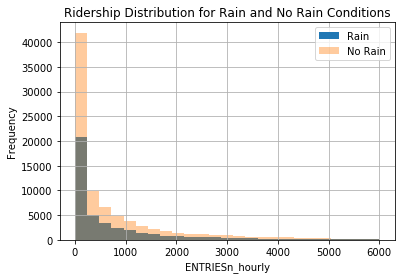

In [69]:
entries_histogram(df_turnstile_weather).show()

### *Exercicio 2.7

Os dados que acabou de plotar que tipo de ditribuicao? Existe diferenca na distribuicao entre dias chuvosos e nao chuvosos?

** Resposta **: A distribuicao obtida no exercicio 2.6 eh uma distribuicao assimetrica do tipo **Distribuicao a Direita**. As distribuicoes sao iguais, mudando apenas a frequencia das entradas ENTRIESn_hourly.

### *Exercicio 2.8

Construa uma funcao que que retorne:

1. A media das entradas com chuva
2. A media das entradas sem chuva




In [70]:
import numpy as np
import pandas

def means(turnstile_weather):
    
    #print(turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain == 1])
    #print(turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain == 0])
    
    #print(turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain == 1].describe())
    #print(turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain == 0].describe())
    
    with_rain_mean = turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain == 1].mean()
    without_rain_mean = turnstile_weather['ENTRIESn_hourly'][turnstile_weather.rain == 0].mean()
    p = None
    
    return with_rain_mean, without_rain_mean, p # leave this line for the grader

In [71]:
[with_rain_mean, without_rain_mean, p] = means(df_turnstile_weather)
print([with_rain_mean, without_rain_mean, p])

[1105.4463767458733, 1090.278780151855, None]


Responda as perguntas abaixo de acordo com a saida das suas funcoes:

1. Qual a media das entradas com chuva?
2. Qual a media das entradas sem chuva?


** Resposta **: 1. A media das entradas com chuva eh de 1105. 2. A media das entradas sem chuva eh de 1090.

## Exercicio 3 - Map Reduce

### *Exercicio 3.1*

A entrada para esse exercicio e o mesmo arquivo da secao anterior (Exercicio 2). Voce pode baixar o arquivo neste link:

 https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Varmos criar um mapeador agora. Para cada linha de entrada, a saida do mapeador deve IMPRIMIR (nao retornar) a UNIT como uma chave e o numero de ENTRIESn_hourly como o valor. Separe a chave e o valor por uma guia. Por exemplo: 'R002 \ t105105.0'

Exporte seu mapeador em um arquivo chamado mapper_result.txt e envie esse arquivo juntamente com a sua submissao. O codigo para exportar seu mapeador ja esta escrito no codigo abaixo.




In [ ]:
import sys

def mapper():
    
    header = False

    for line in sys.stdin:
        # your code here
        if not header:
            header = True
            continue
        data = line.split(',')
        if len(data) == 22:
            unit = data[1]
            entries_hourly = data[6]
            print '{0}\t{1}'.format(unit, entries_hourly)

mapper()

sys.stdin = open('turnstile_data_master_with_weather.csv')
sys.stdout = open('mapper_result.txt', 'w')

### *Exercicio 3.2*

Agora crie o redutor. Dado o resultado do mapeador do exercicio anterior, o redutor deve imprimir (nao retornar) uma linha por UNIT, juntamente com o numero total de ENTRIESn_hourly. Ao longo de maio (que eh a duracao dos nossos dados), separados por uma guia. Um exemplo de linha de saida do redutor pode ser assim: 'R001 \ t500625.0'

Voce pode assumir que a entrada para o redutor esta ordenada de tal forma que todas as linhas correspondentes a uma unidade particular sao agrupados. No entanto a saida do redutor tera repeticao pois existem lojas que aparecem em locais diferentes dos arquivos.

Exporte seu redutor em um arquivo chamado reducer_result.txt e envie esse arquivo juntamente com a sua submissao.

In [ ]:
import sys

def reducer():

    entriesTotal = 0
    oldUnit = None

    for line in sys.stdin:
        data_mapped = line.strip().split("\t")
            if len(data_mapped) != 2: # Something has gone wrong. Skip this line.
            continue
            
        thisUnit, thisEntries = data_mapped

        if oldUnit and (oldUnit != thisUnit):
            print oldUnit, "\t", entriesTotal
            oldUnit = thisUnit
            entriesTotal = 0
            
        oldUnit = thisUnit
            entriesTotal += float(thisEntries)

    if oldUnit != None:
        print oldUnit, "\t", entriesTotal

reducer()